In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from functools import reduce

In [2]:
def get_random_sequence(n):
    return list(map(lambda x: random.random(), range(0, n)))


def show_hist(sequence):
    weights = np.ones_like(sequence) / float(len(sequence))
    plt.hist(sequence, bins=np.linspace(min(sequence), max(sequence), 21),
             weights=weights, histtype='bar', color='purple', rwidth=0.95)
    plt.show()


def review(sequence):
    show_hist(sequence)
    print('\nMean: ', np.mean(sequence), '\nVariance: ',
          np.var(sequence), '\nStandard deviation: ', np.std(sequence), '\n')

# a + (b - a) * x
def get_uniform_distribution(a, b):
    return list(map(lambda x: a + (b - a) * x, get_random_sequence(1000000)))

# M + std * /(12/n) * (random - n/2)
def get_gauss_distribution(mean, std, n=6):
    return list(map(lambda x: mean + std * math.sqrt(12/n) * (sum(get_random_sequence(n)) - n/2), range(0, 1000000)))

# -1/lambda * ln(R)
def get_exponential_distribution(lambda_param):
    return list(map(lambda x: - 1 / lambda_param * math.log(x), get_random_sequence(1000000)))

# -1/lambda * ln(summ(yz))
def get_gamma_distribution(eta, lambda_param):
    return list(map(lambda x: -1 / lambda_param * math.log(reduce(lambda y, z: y*z, get_random_sequence(eta))),
                    range(0, 1000000)))

#  2 * (b - x) / (b - a)^2
def get_min_triangle_distribution(a, b):
    return list(map(lambda x: a + (b - a) * min(get_random_sequence(2)), range(0, 1000000)))

#  2 * (x - a) / (b - a)^2
def get_max_triangle_distribution(a, b):
    return list(map(lambda x: a + (b - a) * max(get_random_sequence(2)), range(0, 1000000)))

# X = y + z
def get_simpson_distribution(a, b):
    return list(map(lambda x, y: x + y, get_uniform_distribution(a/2, b/2), get_uniform_distribution(a/2, b/2)))

Uniform distribution: 


A:  10

B:  20

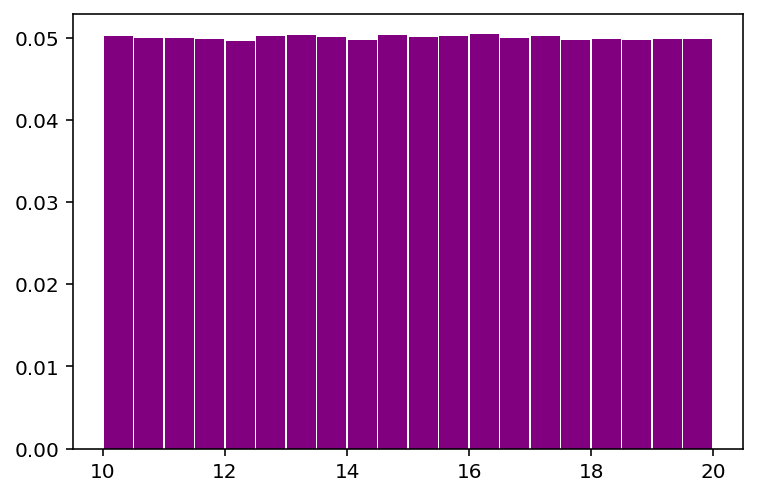


Mean:  14.99810140830304 
Variance:  8.321917219626398 
Standard deviation:  2.884773339384985 

Gauss distribution: 


Mean:  25

Std:  10

N:  40

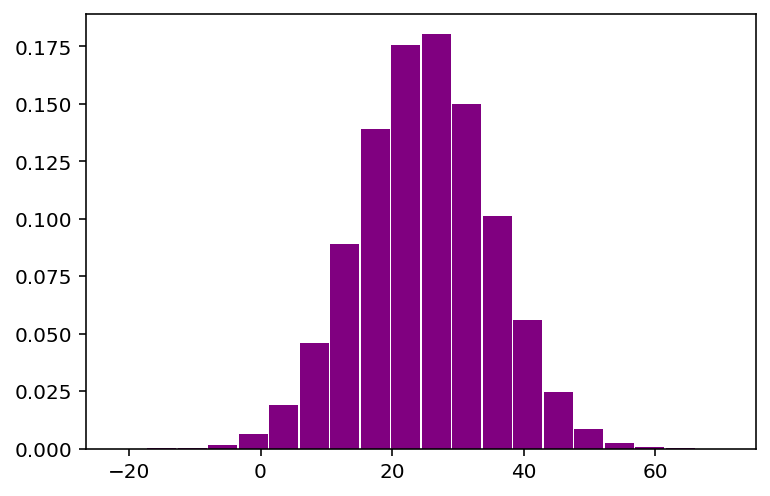


Mean:  24.983890470331982 
Variance:  99.87899423091395 
Standard deviation:  9.993947880137956 

Exponential distribution: 


λ:  30

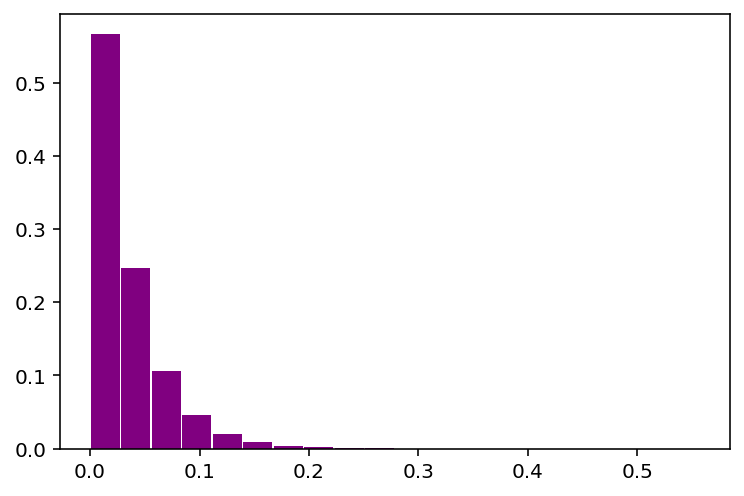


Mean:  0.03333957911289648 
Variance:  0.0011119839283367694 
Standard deviation:  0.033346423021619116 

Gamma distribution: 


η:  10

λ:  20

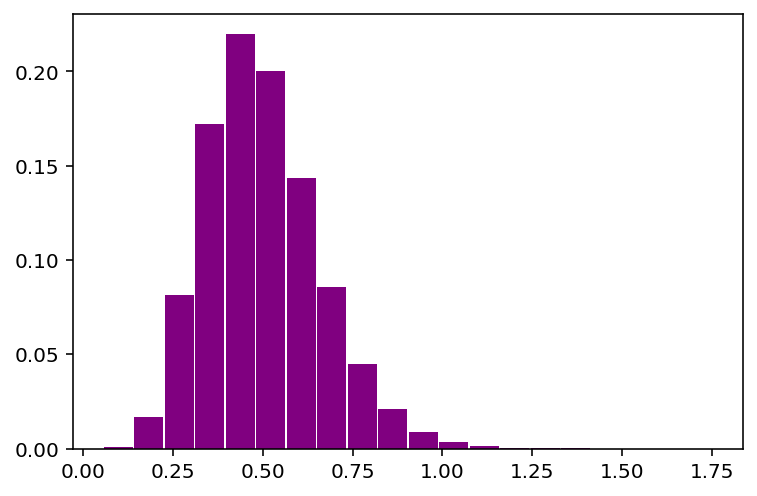


Mean:  0.5002685261928905 
Variance:  0.024987750883737857 
Standard deviation:  0.1580751431558354 

Min-Triangle distribution


A:  10

B:  15

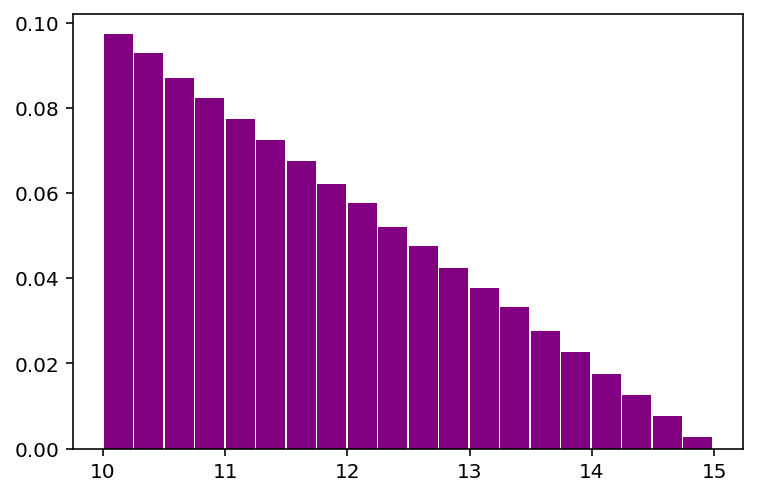


Mean:  11.66762795066331 
Variance:  1.390708302865398 
Standard deviation:  1.1792829613224292 

Max-Triangle distribution


A:  15

B:  10

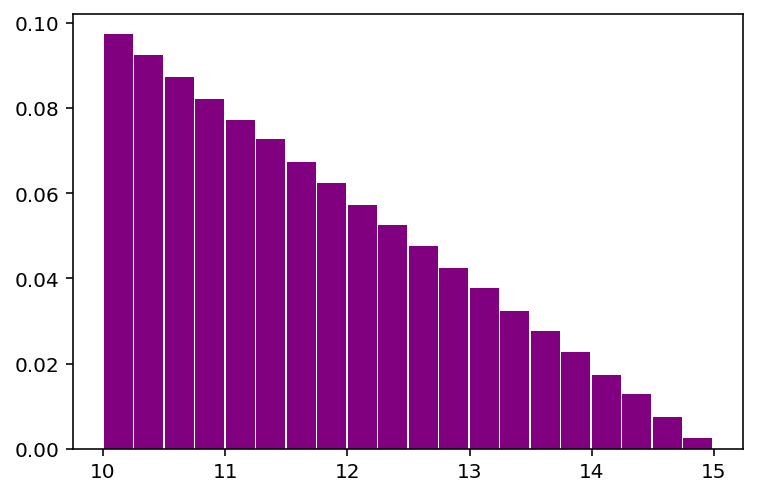


Mean:  11.666521635809447 
Variance:  1.3879182060795345 
Standard deviation:  1.1780994041588913 

Simpson distribution


A:  15

B:  20

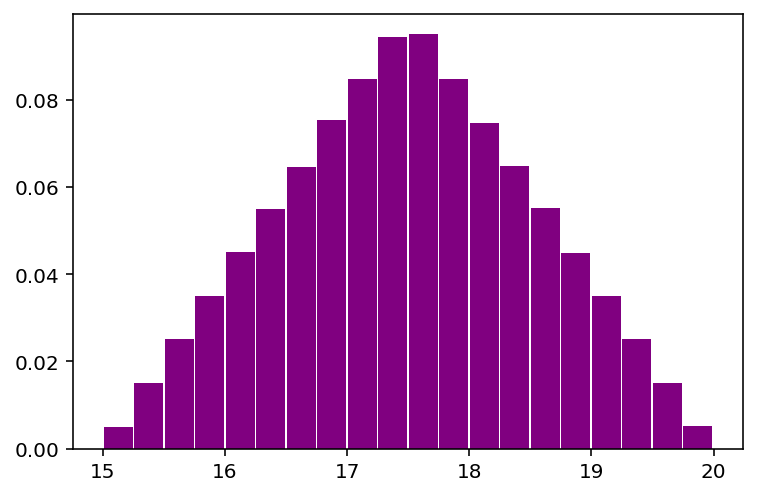


Mean:  17.499604816153944 
Variance:  1.0430914070820325 
Standard deviation:  1.0213184650646596 



In [3]:
print('Uniform distribution: ')
review(get_uniform_distribution(int(input('A: ')), int(input('B: '))))

print('Gauss distribution: ')
review(get_gauss_distribution(int(input('Mean: ')), int(input('Std: ')), int(input('N: '))))

print('Exponential distribution: ')
review(get_exponential_distribution(int(input('λ: '))))

print('Gamma distribution: ')
review(get_gamma_distribution(int(input('η: ')), int(input('λ: '))))

print('Min-Triangle distribution')
review(get_min_triangle_distribution(int(input('A: ')), int(input('B: '))))

print('Max-Triangle distribution')
review(get_max_triangle_distribution(int(input('A: ')), int(input('B: '))))

print('Simpson distribution')
review(get_simpson_distribution(int(input('A: ')), int(input('B: '))))